# Cápitulo 1: Importando Dados e Primeiras Visualizações

### 1.1: Importando Dados

In [10]:
import pandas as pd

# Eliminate the warnings. 
import warnings
warnings.filterwarnings("ignore")

df_raw = pd.read_csv("npl_princeofpersia_raw.csv")

In [11]:
df_raw

,Unnamed: 0,Comentario
0,0,"10ShipwreckTTVJul 1, 2024End credits are rolli..."
1,1,"9aeternumlkJun 27, 2024Great game, one of the ..."
2,2,"10danathaydeJun 15, 2024What an amazing game! ..."
3,3,"9RetroRubenJun 12, 2024Awesome metroidvania wi..."
4,4,"10JAPRASJun 4, 2024Buenísimo el juego, me ha g..."
...,...,...
374,374,"10KezzaxJan 19, 2024Really enjoyed playing the..."
375,375,"10JimiRokaJan 19, 2024Nice game, nice design, ..."
376,376,"10lordpersianJan 19, 2024Masterpiece, Must Pla..."
377,377,"10abdreJan 19, 2024Great new beginning for POP..."


### 1.2: Tipos de Dados

In [12]:
df_raw.dtypes

Unnamed: 0     int64
Comentario    object
dtype: object

# Cápitulo 2: Processamento de Dados

In [13]:
df_clean = df_raw.copy()

# Remover duplicatas mantendo apenas uma ocorrência
df_clean = df_raw.drop_duplicates(subset='Comentario')

# Mostrar DataFrame sem duplicatas
print("DataFrame sem duplicatas:")
df_clean

DataFrame sem duplicatas:


,Unnamed: 0,Comentario
0,0,"10ShipwreckTTVJul 1, 2024End credits are rolli..."
1,1,"9aeternumlkJun 27, 2024Great game, one of the ..."
2,2,"10danathaydeJun 15, 2024What an amazing game! ..."
3,3,"9RetroRubenJun 12, 2024Awesome metroidvania wi..."
4,4,"10JAPRASJun 4, 2024Buenísimo el juego, me ha g..."
...,...,...
374,374,"10KezzaxJan 19, 2024Really enjoyed playing the..."
375,375,"10JimiRokaJan 19, 2024Nice game, nice design, ..."
376,376,"10lordpersianJan 19, 2024Masterpiece, Must Pla..."
377,377,"10abdreJan 19, 2024Great new beginning for POP..."


### 2.1: Limpar Comentários

In [14]:
import re

# Função para limpar o comentário
def limpar_comentario(comentario):
    # Extrai o nome do usuário corretamente, excluindo meses
    nome_usuario_match = re.match(r'^\d*(\D+)', comentario)
    nome_usuario = nome_usuario_match.group(1).strip() if nome_usuario_match else ''

    # Remove os meses do nome do usuário
    nome_usuario = re.split(r'(Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec)', nome_usuario)[0].strip()

    # Extrai a data corretamente
    data_match = re.search(r'(Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec) \d{1,2}, \d{4}', comentario)
    data = data_match.group(0) if data_match else 'Jan 1, 1900'  # Valor padrão caso a data não seja encontrada

    # Converte a data para datetime
    data_datetime = pd.to_datetime(data)

    # Extrai o comentário limpo
    comentario_limpo = re.sub(r'^\d*\D+\w+ \d{1,2}, \d{4}', '', comentario).strip()

    # Remove 'Read More' se existir
    comentario_limpo = comentario_limpo.replace('Read More', '')

    # Remove espaços extras no início e no fim do comentário
    comentario_limpo = comentario_limpo.strip()

    return nome_usuario, data_datetime, comentario_limpo

In [15]:
# Aplica a função ao DataFrame
df_clean[['Nome', 'Data', 'Comentario']] = df_clean['Comentario'].apply(lambda x: pd.Series(limpar_comentario(x)))
df_clean['Comentario_Limpo'] = df_clean['Comentario']
df_clean

,Unnamed: 0,Comentario,Nome,Data,Comentario_Limpo
0,0,End credits are rolling as I write this. After...,ShipwreckTTV,2024-07-01,End credits are rolling as I write this. After...
1,1,"Great game, one of the best game 2024. Many ar...",aeternumlk,2024-06-27,"Great game, one of the best game 2024. Many ar..."
2,2,What an amazing game! After playing Hollow Kni...,danathayde,2024-06-15,What an amazing game! After playing Hollow Kni...
3,3,Awesome metroidvania with a nice little story ...,RetroRuben,2024-06-12,Awesome metroidvania with a nice little story ...
4,4,"Buenísimo el juego, me ha gustado mucho más qu...",JAPRAS,2024-06-04,"Buenísimo el juego, me ha gustado mucho más qu..."
...,...,...,...,...,...
374,374,Really enjoyed playing the game. The gameplay ...,Kezzax,2024-01-19,Really enjoyed playing the game. The gameplay ...
375,375,"Nice game, nice design, nice music good job I ...",JimiRoka,2024-01-19,"Nice game, nice design, nice music good job I ..."
376,376,"Masterpiece, Must Play For Everyone\nGreat Job...",lordpersian,2024-01-19,"Masterpiece, Must Play For Everyone\nGreat Job..."
377,377,Great new beginning for POP as a metroidvania....,abdre,2024-01-19,Great new beginning for POP as a metroidvania....


### 2.2: Traduzir Comentários

In [16]:
from googletrans import Translator
from langdetect import detect

# Instantiate translator
translator = Translator()

# List to store original and translated comments
translated_comments = []

# Function to detect language and translate to English
def traduzir_para_ingles(comentario, index):
    try:
        if detect(comentario) != 'en':
            translated_text = translator.translate(comentario, src=detect(comentario), dest='en').text
            translated_comments.append({'Index': index, 'Original': comentario, 'Translated': translated_text})
            return translated_text
        return comentario
    except:
        return comentario

In [17]:
# Apply the translation function to the 'Comentário' column safely using .loc
df_clean.loc[:, 'Comentario_Limpo'] = df_clean.apply(lambda row: traduzir_para_ingles(row['Comentario_Limpo'], row.name), axis=1)

# Create a DataFrame with the original and translated comments
df_translated = pd.DataFrame(translated_comments)

df_translated.head(10)

,Index,Original,Translated
0,4,"Buenísimo el juego, me ha gustado mucho más qu...","Great game, I liked Metroid Dread.A total jewel!"
1,16,Realmente é um jogo muito bom. Não achei tão f...,It really is a very good game.I didn't find it...
2,18,Сюжет 5/10Безликая история “на нас напали” с р...,"The plot is 5/10, the story “attacked us” with..."
3,19,"El mejor juego de Ubisoft que yo recuerde, es ...",The best Ubisoft game that I remember is an ex...
4,24,"Jogo é bom, mas tem muito bug e os chefes são ...","Game is good, but there are a lot of bug and t..."
5,31,"Un buen juego, mecánicas excelentes, gráficos ...","A good game, excellent mechanics, super graphi..."
6,33,"Excelente metroidvania. Gameplay fluida, ótima...","Excellent Metroidvania.Fluid gameplay, great m..."
7,35,"Prince of Persia: The Lost Crown es, a ciencia...","Prince of Persia: The Lost Crown is, for sure,..."
8,40,Non habitué à ce genre de jeux j'ai voulu tent...,Not used to this kind of games I wanted to try...
9,41,"Malditos bugs. Por lo demás, un juegazo: diver...","Damn Bugs.For the rest, a game: fun, addictive..."


### 2.3: Tratamentos Finais

In [18]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import string
from autocorrect import Speller

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
spell = Speller(lang='en')

# Define text preprocessing function
def preprocess_and_correct_text(text):
    # Remove pontuação e números
    text = re.sub(r'[\d{}]+'.format(re.escape(string.punctuation)), '', text)
    # Tokenização
    words = word_tokenize(text)
    # Remover stop words, lematizar e corrigir ortografia
    processed_words = [spell(lemmatizer.lemmatize(word.lower())) for word in words if word.lower() not in stop_words]
    # Juntar as palavras em uma string única e normalizar espaços em branco
    cleaned_text = ' '.join(processed_words).strip()
    return cleaned_text

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Usuario\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Usuario\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Usuario\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [19]:
df_clean['Comentario_Limpo'] = df_clean['Comentario_Limpo'].apply(preprocess_and_correct_text)
df_clean

,Unnamed: 0,Comentario,Nome,Data,Comentario_Limpo
0,0,End credits are rolling as I write this. After...,ShipwreckTTV,2024-07-01,end credit rolling write hitting wall difficul...
1,1,"Great game, one of the best game 2024. Many ar...",aeternumlk,2024-06-27,great game one best game many happy prince per...
2,2,What an amazing game! After playing Hollow Kni...,danathayde,2024-06-15,amazing game playing hollow knight wasnt sure ...
3,3,Awesome metroidvania with a nice little story ...,RetroRuben,2024-06-12,awesome metroidvania nice little story awesome...
4,4,"Buenísimo el juego, me ha gustado mucho más qu...",JAPRAS,2024-06-04,great game liked metro dread total jewel
...,...,...,...,...,...
374,374,Really enjoyed playing the game. The gameplay ...,Kezzax,2024-01-19,really enjoyed playing game gameplay perfectio...
375,375,"Nice game, nice design, nice music good job I ...",JimiRoka,2024-01-19,nice game nice design nice music good job boug...
376,376,"Masterpiece, Must Play For Everyone\nGreat Job...",lordpersian,2024-01-19,masterpiece must play everyone great job ubiso...
377,377,Great new beginning for POP as a metroidvania....,abdre,2024-01-19,great new beginning pop metroidvania one best


# Cápitulo 3: Análise de Sentimentos

### 3.1: Vader

In [20]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

def analyze_sentiment_vader(text):
    score = analyzer.polarity_scores(text)
    if score['compound'] >= 0.05:
        return 'positivo'
    elif score['compound'] <= -0.05:
        return 'negativo'
    else:
        return 'neutro'

In [21]:
# Aplicar a função à coluna 'Comentário' e armazenar o resultado em uma nova coluna 'Sentimento'
df_clean['Sentimento'] = df_clean['Comentario_Limpo'].apply(analyze_sentiment_vader)

### 3.2: Análise de Resultados

In [22]:
# Filtrar linhas onde 'Sentimento' é 'positivo'
comentarios_positivos = df_clean[df_clean['Sentimento'] == 'positivo']

comentarios_positivos.head(10)

,Unnamed: 0,Comentario,Nome,Data,Comentario_Limpo,Sentimento
0,0,End credits are rolling as I write this. After...,ShipwreckTTV,2024-07-01,end credit rolling write hitting wall difficul...,positivo
1,1,"Great game, one of the best game 2024. Many ar...",aeternumlk,2024-06-27,great game one best game many happy prince per...,positivo
2,2,What an amazing game! After playing Hollow Kni...,danathayde,2024-06-15,amazing game playing hollow knight wasnt sure ...,positivo
3,3,Awesome metroidvania with a nice little story ...,RetroRuben,2024-06-12,awesome metroidvania nice little story awesome...,positivo
4,4,"Buenísimo el juego, me ha gustado mucho más qu...",JAPRAS,2024-06-04,great game liked metro dread total jewel,positivo
5,5,I can say this is my favorite metroidvania sin...,Edugreen,2024-06-02,say favorite metroidvania since hollow knight ...,positivo
6,6,"Amazing mix of Metroid Dread, Mario, Rayman an...",PJMZdanowski,2024-05-20,amazing mix metro dread mario layman dark soul...,positivo
7,7,Changing my review to 1\n\nI got bug locked be...,Dalgach,2024-05-30,changing review got bug locked door wont open ...,positivo
8,8,Metacritic doesnt seem to let you delete revie...,Avenrise,2024-01-28,metacritic doesnt seem let delete review youve...,positivo
9,9,"This game is really fun, but it's been a long ...",Mean_KoreaNZ,2024-05-27,game really fun long time since played game di...,positivo


In [23]:
# Filtrar linhas onde 'Sentimento' é 'negativo'
comentarios_negativos = df_clean[df_clean['Sentimento'] == 'negativo']

comentarios_negativos.head(10)

,Unnamed: 0,Comentario,Nome,Data,Comentario_Limpo,Sentimento
18,18,Сюжет 5/10Безликая история “на нас напали” с р...,kovalennkos,2024-05-03,plot story “ attacked u ” development mystical...,negativo
24,24,"Jogo é bom, mas tem muito bug e os chefes são ...",Slitther,2024-04-19,game good lot bug boss sadthese poorly formula...,negativo
51,51,"1. The overall difficulty is high, requiring a...",ZintrulCre,2024-02-16,overall difficulty high requiring solid grasp ...,negativo
69,69,The ensuing decade saw the series languish in ...,MalBlanc,2024-02-05,ensuing decade saw series anguish obscurity em...,negativo
72,72,"Un juego en 2,5D horrible no se puede comparar...",PedroBonett,2024-02-05,horrible game compared starfield resident evil...,negativo
78,78,I've played every single Prince of Persia game...,TiaxTheMighty,2024-02-01,ive played every single prince persian game fa...,negativo
95,95,Just terrible. Franchise has take a huge step ...,Perknutz,2024-01-25,terrible franchise take huge step backwards su...,negativo
97,97,Worst PS2 graphics game.There is not playabili...,ArthurFranck,2024-01-25,worst p graphic gamethere playabilitythey dont...,negativo
115,115,Holy macaroni was I not expecting this. Creme ...,yagulja,2024-01-22,holy macron expecting crime de la crime every ...,negativo
118,118,This game really nails its combat and boss fig...,Joshy_,2024-01-22,game really nail combat bos fight art style ga...,negativo


In [24]:
# Filtrar linhas onde 'Sentimento' é 'neutro'
comentarios_neutros = df_clean[df_clean['Sentimento'] == 'neutro']

comentarios_neutros.head(10)

,Unnamed: 0,Comentario,Nome,Data,Comentario_Limpo,Sentimento
102,102,GooooooodThank you for using Farsi dubbing and...,Pouyarnir,2024-01-23,goobthank using first dubbing subututes مرستفا...,neutro
318,318,"Excellent,(Thank you Ubisoft for Publishing \n...",Hesammk,2024-01-20,excellentthank ubisoft publishing persian dubb...,neutro
334,334,Because of Gaming Yard\n\n\n\n\n\n\n\n\n\n\n\n...,Quirrello,2024-01-20,gaming yard,neutro
362,362,Have you ever played a game in which you find ...,KrisMoe,2024-01-19,ever played game find bug every minute present...,neutro


# Cápitulo 4: Análise Visual

### 4.1: Distribuição de Sentimentos

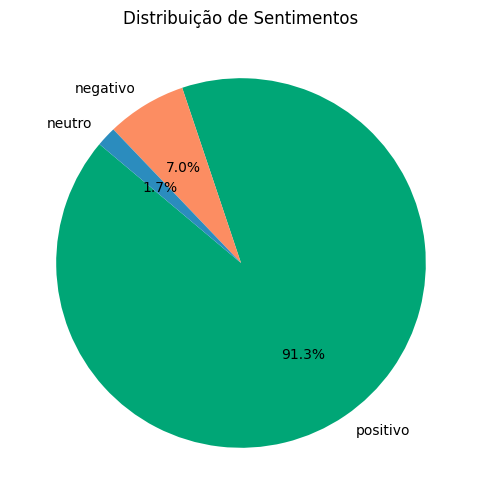

In [25]:
import matplotlib.pyplot as plt

# Conta a quantidade de cada valor na coluna 'Sentimento'
contagem_sentimentos = df_clean['Sentimento'].value_counts()

# Prepara os dados para o gráfico de pizza
labels = contagem_sentimentos.index
sizes = contagem_sentimentos.values

# Cores correspondentes aos sentimentos
cores = {
    'positivo': '#00a676',  # Verde mais escuro
    'neutro': '#2b8cbe',    # Azul mais escuro
    'negativo': '#fc8d62'   # Vermelho mais escuro
}

# Cria o gráfico de pizza
plt.figure(figsize=(8, 6))  # Tamanho da figura (opcional)
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=[cores[label] for label in labels])

# Adiciona título
plt.title('Distribuição de Sentimentos')

# Mostra o gráfico
plt.show()

### 4.2: Análise Temporal de Comentários

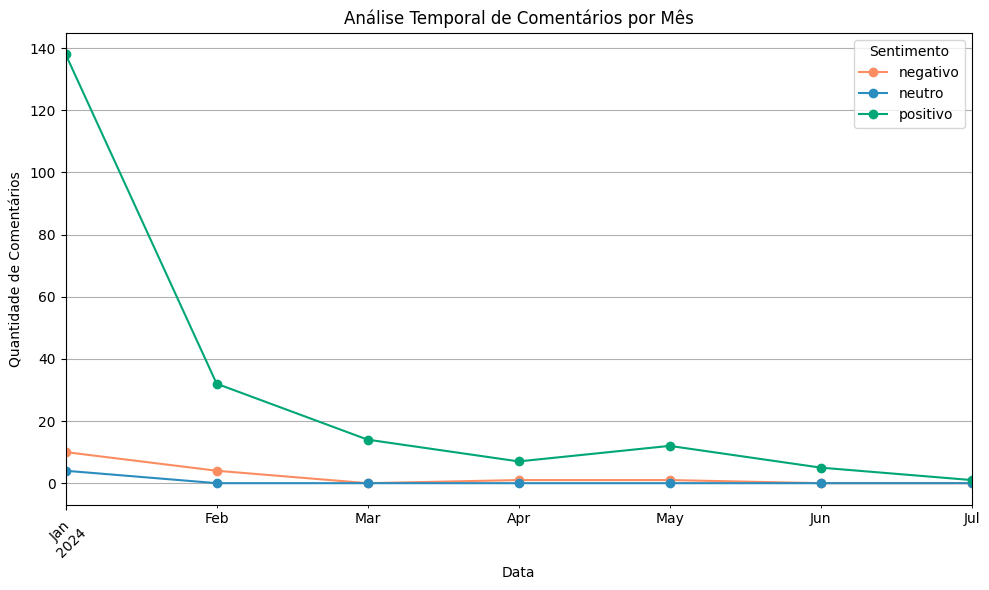

In [29]:
# Agrupar por Mês e sentimento
comentarios_por_semana = df_clean.groupby([pd.Grouper(key='Data', freq='M'), 'Sentimento']).size().unstack(fill_value=0)

# Plotar o gráfico de linha com cores personalizadas
ax = comentarios_por_semana.plot(kind='line', marker='o', linestyle='-', figsize=(10, 6), color=[cores.get(x, '#333333') for x in comentarios_por_semana.columns])
plt.xlabel('Data')
plt.ylabel('Quantidade de Comentários')
plt.title('Análise Temporal de Comentários por Mês')
plt.legend(title='Sentimento')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()

In [27]:
# df_clean.to_csv("npl_princeofpersia_clean.csv")